# scad

> OpenSCAD interface

In [ ]:
#| default_exp scad

In [ ]:
#| export
#import solid2
from solid2.core.object_base.object_base_impl import RenderMixin
from solid2 import *
import subprocess

from PIL import Image
import io
from fastcore.all import *

import matplotlib.pyplot as plt

In [ ]:
#| export
colorscheme = "Tomorrow Night" #"Cornfield"
colorschemes = [
    "Cornfield", "Metallic", "Sunset", "Starnight",
    "BeforeDawn", "Nature", "DeepOcean", "Solarized",
    "Tomorrow", "Tomorrow Night", "Monotone"
]

In [ ]:
#| export
def export_to(model, export_format, w=300, h=150, colorscheme=None):
    colorscheme = colorscheme or globals()['colorscheme']
    
    result = subprocess.run(
        ['openscad', '--colorscheme', colorscheme, '--imgsize', f'{w},{h}', '--export-format', export_format, '-o', '-', '-'],
        input=bytes(str(model), 'utf-8'),
        capture_output=True
    )
    return result.stdout

In [ ]:
#| export
def to_img(model, w=300, h=150, colorscheme=None):
    "Convert model to image"

    data = export_to(model, "png", w=w, h=h, colorscheme=colorscheme)

    return Image.open(io.BytesIO(data))

Lets add simple and fast automatic previews for all models:

In [ ]:
@patch
def _repr_png_(self: RenderMixin):
    return to_img(self)._repr_png_()

del RenderMixin._ipython_display_

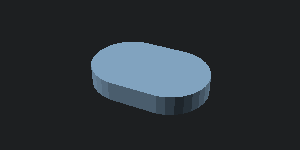

In [ ]:
d = (cylinder(5,r=10).right(5) + cylinder(5,r=10).left(5)).hull()
d

## Colorschemes

You can configure the colorscheme you like by setting `scad.colorscheme` to appropritate string:

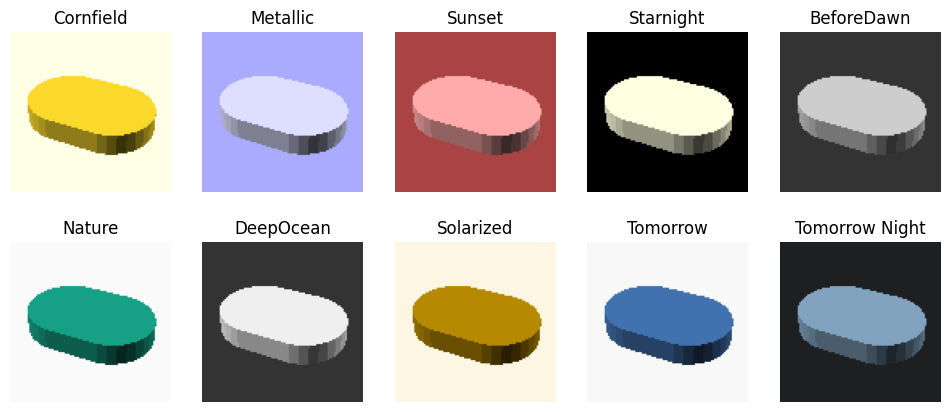

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(12,5)) # 2,5
axs = axs.flatten()

for ax, cs in zip(axs, colorschemes):
    ax.imshow(to_img(d, 100, 100, cs))
    ax.axis("off")
    ax.set_title(cs)

## Exporting to STL

In [ ]:
import solid2

In [ ]:
d.save_as_stl??

Signature: d.save_as_stl(filename=None)
Docstring: <no docstring>
Source:   
    def save_as_stl(self, filename=None):
        from ..scad_render import render_to_stl_file
        return render_to_stl_file(self, filename)
File:      ~/nbdev/contrib/SolidPython/solid2/core/object_base/object_base_impl.py
Type:      method

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
def foo(): pass

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()